In [1]:
import sys
sys.path.append('../../')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [3]:
from sample_data import sample_data
from fscoreai import linear

# Univariate Linear Data

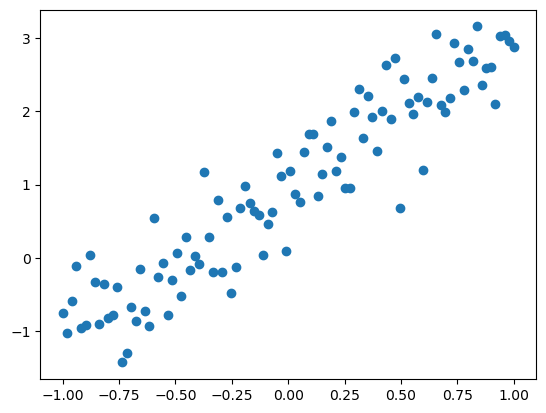

In [4]:
X, y = sample_data.simulate_linear_data()
plt.scatter(X, y)

## Sklearn Model

In [5]:
model_skl = linear_model.LinearRegression()
model_skl.fit(X, y)
print(model_skl.intercept_, model_skl.coef_)

[0.94807674] [[2.03448317]]


## Custom Class

In [6]:
# Closed Form 
model = linear.LinearRegression()
model.fit_closed_form(X, y)
print(model.intercept_, model.coef_)

[0.94807674] [[2.03448317]]


In [7]:
# Gradient Descent
model = linear.LinearRegression()
model.fit(X, y, learning_rate=1e-3, n_epochs=100)
print(model.intercept_, model.coef_)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 51482.80it/s]

[1.10614553] [[-0.47659774]]


## Plotting

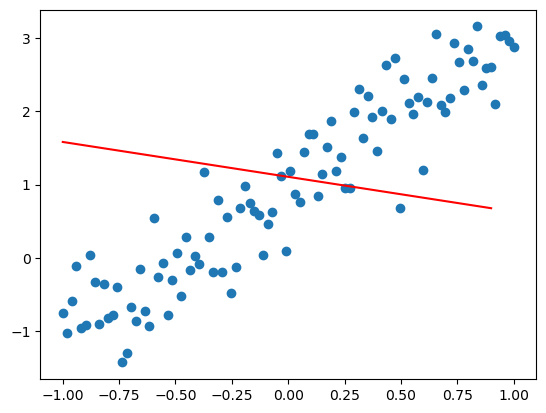

In [8]:
X_test = np.arange(X.min(), X.max(), 0.1).reshape(-1, 1)
y_pred = model.predict(X_test)
plt.scatter(X, y)
plt.plot(X_test, y_pred, c="red")

# Multivariate Linear Data

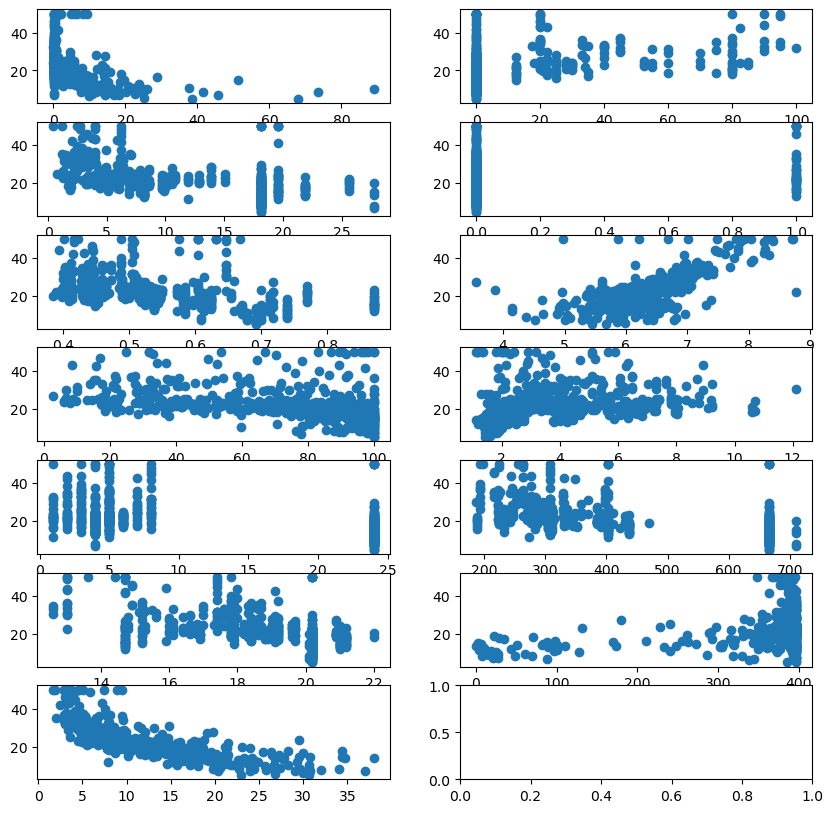

In [9]:
X, y = sample_data.boston_house_data()
fig, ax = plt.subplots(7,2, figsize=(10,10))
ax[0][0].scatter(X[:, 0], y) #crime
ax[0][1].scatter(X[:, 1], y) #zoning
ax[1][0].scatter(X[:, 2], y) #industry
ax[1][1].scatter(X[:, 3], y) #charles river
ax[2][0].scatter(X[:, 4], y) #nox
ax[2][1].scatter(X[:, 5], y) #number pf rooms
ax[3][0].scatter(X[:, 6], y) #age
ax[3][1].scatter(X[:, 7], y) #dis
ax[4][0].scatter(X[:, 8], y) #rad
ax[4][1].scatter(X[:, 9], y) #tax
ax[5][0].scatter(X[:, 10], y) #ptratio
ax[5][1].scatter(X[:, 11], y) #black
ax[6][0].scatter(X[:, 12], y) #black

In [10]:
X = X[:, [0, 5]]

## Sklearn Model

In [11]:
model_skl = linear_model.LinearRegression()
model_skl.fit(X, y)
print(model_skl.intercept_, model_skl.coef_)

[-29.24471945] [[-0.26491325  8.39106825]]


## Custom Class

In [12]:
# Closed Form 
model = linear.LinearRegression()
model.fit_closed_form(X, y)
print(model.intercept_, model.coef_)

[-29.24471945] [[-0.26491325]
 [ 8.39106825]]


In [13]:
# Gradient Descent
model = linear.LinearRegression()
model.fit(X, y, learning_rate=1e-2, n_epochs=100000)
print(model.intercept_, model.coef_)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100000/100000 [00:01<00:00, 68411.27it/s]

[-29.2402582] [[-0.26492812]
 [ 8.39037488]]


## Plotting

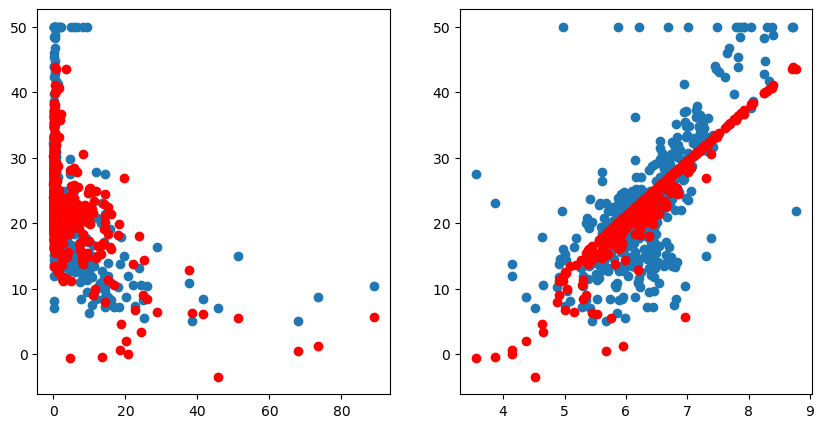

In [19]:
y_pred = model.predict(X)
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].scatter(X[:, 0], y)
ax[0].scatter(X[:, 0], y_pred, c="red")
ax[1].scatter(X[:, 1], y)
ax[1].scatter(X[:, 1], y_pred, c="red")